In [3]:
## RUN THEN DELETE THIS CELL BEFORE THE DEMO

# Import libraries
import matplotlib.pyplot as plt
import quandl
import pandas as pd
from fbprophet import Prophet

# Configure plotting functions
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
data = quandl.get("EURONEXT/AD", authtoken="Byjzu4U8rmR1iEhZnp7V")

In [4]:
data.tail()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2020-11-25,23.34,23.48,23.15,23.39,3431815.0,80118256.0
2020-11-26,23.42,23.70,23.40,23.58,3190483.0,75242677.0
2020-11-27,23.51,23.95,23.50,23.81,3588911.0,85435454.0
2020-11-30,23.86,24.21,23.69,23.99,6608226.0,158566187.0
2020-12-01,23.51,23.92,23.48,23.75,4407301.0,104486874.0


<AxesSubplot:xlabel='Date'>

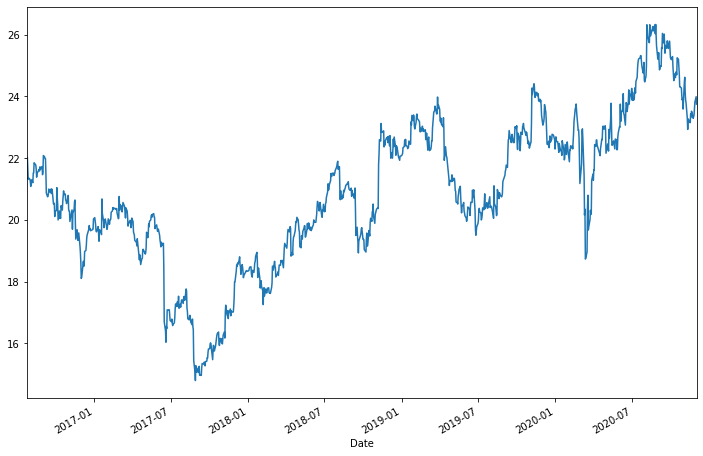

In [5]:
data.Last.plot()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


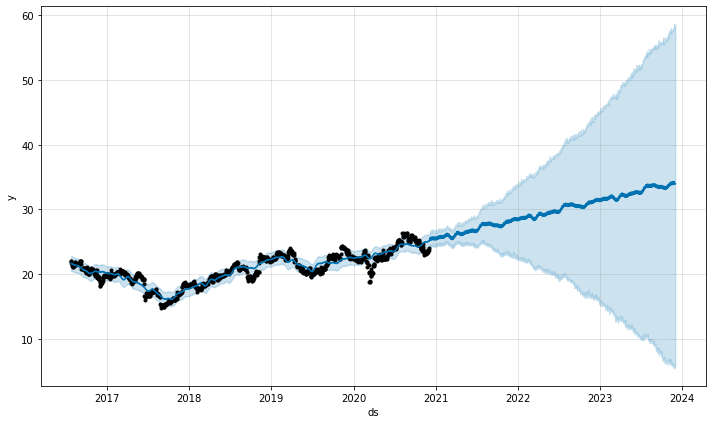

In [6]:
# Transform data
prophet_data = pd.DataFrame(data.Last)
prophet_data.reset_index(inplace=True)
prophet_data.columns = ["ds", "y"]
# Fit model
m = Prophet()
m.fit(prophet_data)
# Generate predictions
future = m.make_future_dataframe(periods=3*365)
forecast = m.predict(future)
# Plot prediction
m.plot(forecast);

## Dow Jones Industrial Average

In [7]:
# Configure Quandl access
quandl.ApiConfig.api_key = "Byjzu4U8rmR1iEhZnp7V"

In [8]:
# Get Data
data = quandl.get("BCB/UDJIAD1") #Dow Jones Industrial Average

In [9]:
data.shape

(32601, 1)

In [10]:
# Examine data
data.tail()

,Value
Date,
2016-04-11,17556.41
2016-04-12,17721.25
2016-04-13,17908.28
2016-04-14,17926.43
2016-04-15,17897.46


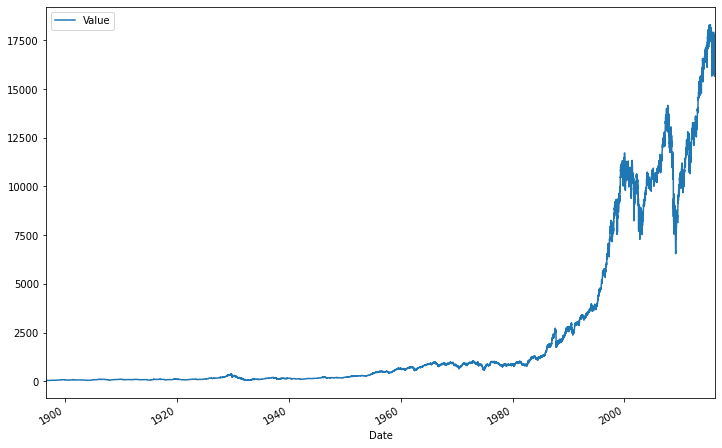

In [11]:
# Plot Data
data.plot();

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


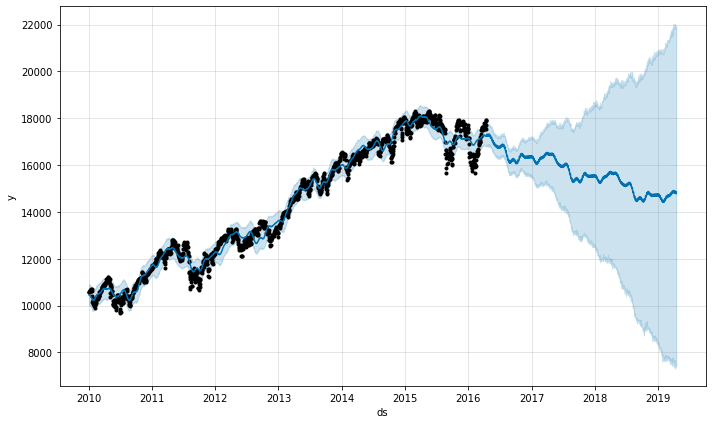

In [12]:
# Transform data
data_sub = data["2010-01-01":]
prophet_data = data_sub.reset_index()
prophet_data.columns = ["ds", "y"]
prophet_data.head()
# Fit model
m = Prophet()
m.fit(prophet_data)
# Generate predictions
future = m.make_future_dataframe(periods=3*365)
forecast = m.predict(future)
# Plot prediction
m.plot(forecast);